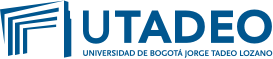

# **APRENDIZAJE AUTOMÁTICO (2S-2025)**
**Exposición - Ethical AI - Libreria [TransparentAI](https://transparentai.readthedocs.io/en/latest/)**

**Grupo 1**

* Edisson Cabrera Eraso

* Angelica Maria Maldonado Rodriguez

* Maria Del Pilar Chaparro Miranda

* Juan Esteban Correa Alvarez

**Objetivo:**

Evaluar si un modelo de IA (por ejemplo, uno que predice si alguien recibe un préstamo) es justo con respecto al género.

**Instalación libreria**

In [9]:
pip install --upgrade transparentai

**Versión**

In [11]:
pip show transparentai

Name: transparentai
Version: 0.2.2
Summary: Python tool to create or inspect a transparent and ethical AI.
Home-page: https://github.com/Nathanlauga/transparentai
Author: Nathan LAUGA
Author-email: nathan.lauga@protonmail.com
License: MIT
Location: /usr/local/lib/python3.12/dist-packages
Requires: energyusage, ipywidgets, matplotlib, numpy, pandas, safety, scikit-learn, seaborn, shap
Required-by: 


**Modelo analizado y evaluación ética**

El modelo se entrenó utilizando el conjunto de datos **Adult Income**, disponible públicamente en la plataforma [OpenML](https://www.openml.org/d/1590) e importado mediante la función [`fetch_openml`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html) de la librería *scikit-learn*.  

Este dataset contiene información demográfica y laboral con el propósito de predecir si una persona gana más de 50.000 dólares anuales, lo que lo convierte en un caso de uso común para evaluar sesgos y métricas de equidad en modelos de clasificación.

Dentro de las variables se incluye el atributo sensible **sexo**, utilizado para analizar posibles sesgos de equidad.

**Ejemplo completo en Python**

In [16]:
# =========================================================
# Ejemplo completamente funcional — TransparentAI v0.2.2
# =========================================================

from transparentai.fairness import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 1️ - Cargar dataset
data = fetch_openml(data_id=1590, as_frame=True)  # Adult Income
df = data.frame

X = df.drop(columns=["class"])
y = (df["class"] == ">50K").astype(int)
prot_attr = df["sex"]  # atributo protegido (variable sensible)

# 2️ - Preprocesar
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# 3️ - Modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 4️ - Calcular métricas de equidad
print("\n MÉTRICAS DE EQUIDAD (TransparentAI v0.2.2)\n")

print("Disparate Impact:",
      metrics.disparate_impact(y_test, y_pred, prot_attr.loc[y_test.index]))

print("Statistical Parity Difference:",
      metrics.statistical_parity_difference(y_test, y_pred, prot_attr.loc[y_test.index]))

print("Equal Opportunity Difference:",
      metrics.equal_opportunity_difference(y_test, y_pred, prot_attr.loc[y_test.index]))

print("Average Odds Difference:",
      metrics.average_odds_difference(y_test, y_pred, prot_attr.loc[y_test.index]))

print("Theil Index:",
      metrics.theil_index(y_test, y_pred, prot_attr.loc[y_test.index]))


 MÉTRICAS DE EQUIDAD (TransparentAI v0.2.2)

Disparate Impact: nan
Statistical Parity Difference: 0.0
Equal Opportunity Difference: 0.0
Average Odds Difference: 0.0
Theil Index: 0.1088319846125461


/usr/local/lib/python3.12/dist-packages/transparentai/fairness/metrics.py:169: RuntimeWarning: invalid value encountered in scalar divide
  return (metric_fun(*args, privileged=False)


**Explicación breve de cada métrica**

| **Métrica**                  | **Qué mide**                                                                 | **Ideal** |
|--------------------------------|------------------------------------------------------------------------------|------------|
| **Disparate Impact**           | Proporción de decisiones positivas entre grupos (ej. hombres vs mujeres).    | ≈ 1.0      |
| **Statistical Parity Difference** | Diferencia de tasas positivas entre grupos.                                  | ≈ 0        |
| **Equal Opportunity Difference** | Diferencia en *recall* entre grupos (quiénes realmente merecían un “sí”).    | ≈ 0        |
| **Average Odds Difference**     | Promedio de diferencia en *TPR* y *FPR* entre grupos.                        | ≈ 0        |
| **Theil Index**                 | Medida de desigualdad general en las predicciones.                           | ≈ 0        |


**Interpretación**

TransparentAI permite:

* Detectar si el modelo favorece/desfavorece a un grupo.

* Cumplir con auditorías éticas.

* Documentar métricas de transparencia y explicabilidad.

**Explicación rápida**

| **Parámetro** | **Significado** |
|------------------|-----------------|
| **y_test**       | Valores reales (etiquetas verdaderas). |
| **y_pred**       | Predicciones del modelo. |
| **prot_attr**    | Atributo protegido o sensible (ej. sexo, raza, edad). |

**Código con gráficos separados por métrica**


 MÉTRICAS DE EQUIDAD (TransparentAI v0.2.2)

Impacto desigual: nan
Diferencia de paridad estadística: 0.0000
Diferencia de igualdad de oportunidades: 0.0000
Diferencia de probabilidades promedio: 0.0000
Índice de Theil: 0.1088


/usr/local/lib/python3.12/dist-packages/transparentai/fairness/metrics.py:169: RuntimeWarning: invalid value encountered in scalar divide
  return (metric_fun(*args, privileged=False)


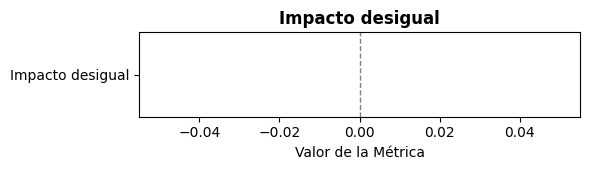

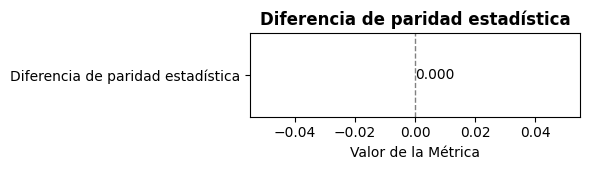

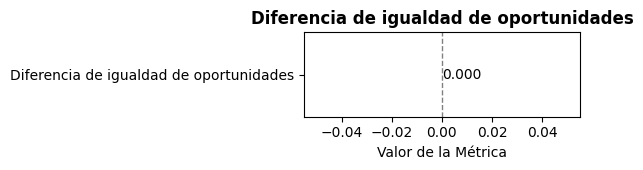

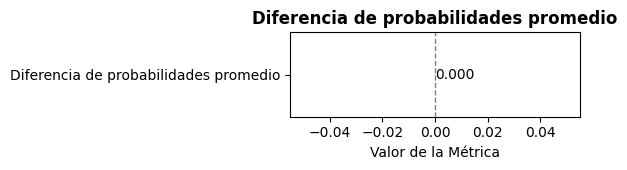

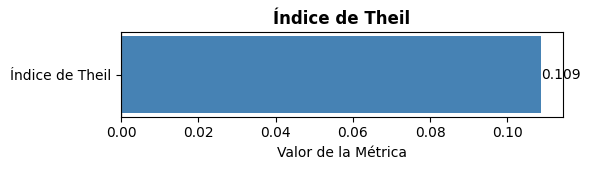

In [19]:
# =========================================================
# Análisis de Equidad (Fairness) con TransparentAI v0.2.2
# Gráficas independientes con Matplotlib
# =========================================================

from transparentai.fairness import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# 1️ - Cargar dataset
data = fetch_openml(data_id=1590, as_frame=True)  # Adult Income
df = data.frame

X = df.drop(columns=["class"])
y = (df["class"] == ">50K").astype(int)
prot_attr = df["sex"]  # atributo protegido

# 2️ - Preprocesar datos
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# 3️ - Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 4️ - Calcular métricas de equidad
results = {
    "Impacto desigual": metrics.disparate_impact(y_test, y_pred, prot_attr.loc[y_test.index]),
    "Diferencia de paridad estadística": metrics.statistical_parity_difference(y_test, y_pred, prot_attr.loc[y_test.index]),
    "Diferencia de igualdad de oportunidades": metrics.equal_opportunity_difference(y_test, y_pred, prot_attr.loc[y_test.index]),
    "Diferencia de probabilidades promedio": metrics.average_odds_difference(y_test, y_pred, prot_attr.loc[y_test.index]),
    "Índice de Theil": metrics.theil_index(y_test, y_pred, prot_attr.loc[y_test.index])
}

# 5️ - Mostrar resultados numéricos
print("\n MÉTRICAS DE EQUIDAD (TransparentAI v0.2.2)\n")
for k, v in results.items():
    print(f"{k}: {v:.4f}")

# 6️ - Crear gráficos independientes
for metric, value in results.items():
    plt.figure(figsize=(6, 1.8))
    plt.barh([metric], [value], color='steelblue')
    plt.text(value, 0, f"{value:.3f}", va='center', ha='left', fontsize=10)
    plt.axvline(0, color='gray', linestyle='--', linewidth=1)
    plt.title(f"{metric}", fontsize=12, fontweight='bold')
    plt.xlabel("Valor de la Métrica")
    plt.tight_layout()
    plt.show()

**Interpretación técnica de las métricas de equidad**

Las gráficas presentadas ilustran los resultados de las métricas de equidad aplicadas al modelo de clasificación.

Cada métrica se representa mediante una barra horizontal cuyo valor se interpreta con respecto a una **línea base en cero**, que simboliza la ausencia de sesgo entre los grupos del atributo protegido (en este caso, *sexo*).

- **Impacto desigual (Disparate Impact)** y **diferencia de paridad estadística (Statistical Parity Difference)** evalúan la equidad en la distribución general de las decisiones positivas del modelo.  
  - Valores próximos a 1 (en el caso del impacto desigual) o a 0 (en el caso de la diferencia de paridad) reflejan un comportamiento equilibrado entre los grupos.  

- **Diferencia de igualdad de oportunidades (Equal Opportunity Difference)** y **diferencia de probabilidades promedio (Average Odds Difference)** analizan la equidad condicional, es decir, si el modelo concede las mismas tasas de verdaderos positivos y falsos positivos entre los grupos.  
  - Valores cercanos a 0 indican un desempeño equitativo en la detección de casos positivos reales.  

- **Índice de Theil** mide la desigualdad global en las predicciones del modelo.  
  - Valores más bajos implican una distribución más uniforme y, por tanto, un modelo más justo.

En conjunto, estas métricas permiten una evaluación integral del **comportamiento ético y no discriminatorio del modelo**, aportando evidencia cuantitativa sobre su grado de **justicia algorítmica** y ayudando a identificar posibles sesgos estructurales en los datos o el proceso de aprendizaje.

De acuerdo con los resultados obtenidos, las métricas de equidad —como el *impacto desigual*, la *diferencia de paridad estadística* y la *igualdad de oportunidades*— mostraron valores **cercanos a cero**, lo que sugiere que el modelo **no presenta un sesgo significativo** hacia ninguno de los grupos analizados.  

Sin embargo, el **Índice de Theil** reflejó un valor moderado, lo que indica cierta **desigualdad residual en las predicciones** que podría deberse a la naturaleza del dataset o a la representación de los grupos.

En términos generales, el modelo puede considerarse **éticamente aceptable** bajo los criterios de equidad analizados, aunque se recomienda una revisión más profunda del preprocesamiento y balance de datos para minimizar cualquier posible sesgo implícito.